<a href="https://colab.research.google.com/github/zahidulhasan95503/Clothes-name-predction/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#labels

#0	          T-shirt/top
#1	          Trouser
#2	          Pullover
#3	          Dress
#4	          Coat
#5	          Sandal
#6	          Shirt
#7	          Sneaker
#8	          Bag
#9	          Ankle boot

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
clothes = ["T-shirt/ Top","Trouser","pullover","Dress","Coat","shirt","sandal","Sneaker","Bag","Ankle_Boot"]

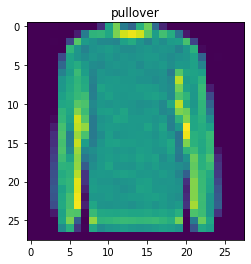

In [ ]:
i=45
plt.imshow(x_train[i])
plt.title(clothes[y_train[i]])
plt.show()

In [ ]:
#normalization
# from(0-255) to (0-1)
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.max()

1.0

In [ ]:
#CNN MODEL
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape =(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1523,activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1523)              2

In [ ]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 101s 53ms/step - loss: 0.4007 - accuracy: 0.8540
Epoch 2/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2701 - accuracy: 0.8986
Epoch 3/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2201 - accuracy: 0.9174
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1829 - accuracy: 0.9310
Epoch 5/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1521 - accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1268 - accuracy: 0.9517
Epoch 7/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1018 - accuracy: 0.9624
Epoch 8/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0829 - accuracy: 0.9686
Epoch 9/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0693 - accuracy: 0.9736
Epoch 10/10
1875/1875 [==============================] - 99s 

In [ ]:
y_pred = model.predict(x_test)
y_pred =np.argmax(y_pred,axis =1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test.flatten()

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.3682 - accuracy: 0.9159


[0.36815735697746277, 0.9158999919891357]

In [ ]:
accuracy_score(y_pred,y_test)

0.9159